In [74]:
import os
import pandas as pd
import requests
from sklearn.preprocessing import MinMaxScaler
import json
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import FigureCanvasPdf, PdfPages
from matplotlib.figure import Figure
import numpy as np
import chart_studio.plotly as py
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as shc

In [5]:
print(__version__) # requires version >= 1.9.0

4.9.0


In [6]:
# For Notebooks
init_notebook_mode(connected=True)

In [7]:
# For offline use
cf.go_offline()

In [8]:
#os.listdir()

In [9]:
#os.chdir("drive/My Drive/Studio-Lab-Healthcare-Ellinger/kmeans")

In [10]:
a = requests.get("https://github.com/AhmadzadehSanaz/Studio-Lab-Healthcare-Ellinger/raw/main/Data%20Pipeline/hexagon_collection_master.geojson")

In [11]:
data = a.json()

In [12]:
# with open("datafilename.geojson") as jsonFile:
# data = json.loads(jsonFile.read()

In [13]:
features = [f["properties"] for f in data["features"]]

In [14]:
df = pd.DataFrame.from_records(features)

In [15]:
df.head()

,fid,id,top,right,bottom,adult_obesity,total_population,hispanic_or_latino_population_number_mean,non_hispanic_african_american_or_black_population_number_mean,non_hispanic_asian_or_pacific_islander_population_number_mean,...,nearest_bus_station_name,nearest_bus_station_distance,nearest_bike_station_name,nearest_bike_station_distance,bike_station_count,predominant_race_by_population_per_cell,hispanic_or_latino_cell,non_hispanic_african_american_or_black_cell,non_hispanic_asian_or_pacific_islander_cell,non_hispanic_white_cell
0,1,6274,1.913898e+06,1.162049e+06,1.911258e+06,140500.000000,79532.000000,28172.500000,5053.500000,2817.0,...,Milwaukee & Oakley/Moffat,0.054090,Western Ave & Winnebago Ave,0.072335,2.0,Non-Hispanic White,0,0,0,1
1,2,6275,1.911258e+06,1.162049e+06,1.908618e+06,133000.000000,84458.000000,22477.000000,6551.000000,3373.0,...,Western & Le Moyne,0.067718,Claremont Ave & Hirsch St,0.054763,3.0,Non-Hispanic White,0,0,0,1
2,3,6272,1.919178e+06,1.162049e+06,1.916538e+06,159750.000000,53749.750000,16572.250000,2050.750000,2369.0,...,Western & Schubert,0.112082,Logan Blvd & Elston Ave,0.091337,1.0,Non-Hispanic White,0,0,0,1
3,4,6273,1.916538e+06,1.162049e+06,1.913898e+06,148000.000000,74606.000000,33868.000000,3556.000000,2261.0,...,Western & Belden,0.097150,Campbell Ave & Fullerton Ave,0.219662,1.0,Hispanic or Latino,1,0,0,0
4,5,6278,1.903338e+06,1.162049e+06,1.900698e+06,110333.333333,55750.666667,9764.666667,14421.666667,4577.0,...,Western & Fulton,0.028106,Artesian Ave & Hubbard St,0.216887,1.0,Non-Hispanic White,0,0,0,1


In [16]:
df.columns

Index(['fid', 'id', 'top', 'right', 'bottom', 'adult_obesity',
       'total_population', 'hispanic_or_latino_population_number_mean',
       'non_hispanic_african_american_or_black_population_number_mean',
       'non_hispanic_asian_or_pacific_islander_population_number_mean',
       'non_hispanic_white_population_number_mean', 'park_count',
       'population_no_health_insurance', 'median_household_income',
       'hospital_count', 'cta_rail_station_count', 'cta_bus_station_count',
       'asthma_population_number', 'diabetes_population_number',
       'air_quality_index_number', 'air_quality_PM10_number\t',
       'air_quality_PM25_number', 'nearest_park_name', 'nearest_park_distance',
       'nearest_hospital_name', 'nearest_hospital_distance',
       'nearest_cta_rail_station_name', 'nearest_cta_rail_station_distance',
       'nearest_bus_station_name', 'nearest_bus_station_distance',
       'nearest_bike_station_name', 'nearest_bike_station_distance',
       'bike_station_count',

In [17]:
exclude = ['fid', 'id', 'top', 'right', 'bottom',"predominant_race_by_population_per_cell"]

In [18]:
withName = [i for i in df.columns if "name" in i]

In [19]:
exclude = exclude + withName

In [20]:
exclude

['fid',
 'id',
 'top',
 'right',
 'bottom',
 'predominant_race_by_population_per_cell',
 'nearest_park_name',
 'nearest_hospital_name',
 'nearest_cta_rail_station_name',
 'nearest_bus_station_name',
 'nearest_bike_station_name']

In [21]:
race = pd.get_dummies(df["predominant_race_by_population_per_cell"])

In [22]:
race

,Hispanic or Latino,Non-Hispanic African American or Black,Non-Hispanic Asian or Pacific Islander,Non-Hispanic White
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
1233,0,1,0,0
1234,0,1,0,0
1235,0,1,0,0
1236,0,1,0,0


In [23]:
df["predominant_race_by_population_per_cell"].unique()

array(['Non-Hispanic White', 'Hispanic or Latino',
       'Non-Hispanic African American or Black',
       'Non-Hispanic Asian or Pacific Islander'], dtype=object)

In [24]:
X = df.drop(exclude,axis=1)

In [25]:
X.head()

,adult_obesity,total_population,hispanic_or_latino_population_number_mean,non_hispanic_african_american_or_black_population_number_mean,non_hispanic_asian_or_pacific_islander_population_number_mean,non_hispanic_white_population_number_mean,park_count,population_no_health_insurance,median_household_income,hospital_count,...,nearest_park_distance,nearest_hospital_distance,nearest_cta_rail_station_distance,nearest_bus_station_distance,nearest_bike_station_distance,bike_station_count,hispanic_or_latino_cell,non_hispanic_african_american_or_black_cell,non_hispanic_asian_or_pacific_islander_cell,non_hispanic_white_cell
0,140500.000000,79532.000000,28172.500000,5053.500000,2817.0,41541.500000,2,10409.000000,73183.000000,0,...,0.107567,0.569742,0.090404,0.054090,0.072335,2.0,0,0,0,1
1,133000.000000,84458.000000,22477.000000,6551.000000,3373.0,49729.000000,2,9424.000000,79013.000000,1,...,0.175790,0.071033,0.435950,0.067718,0.054763,3.0,0,0,0,1
2,159750.000000,53749.750000,16572.250000,2050.750000,2369.0,31349.750000,1,6492.250000,80099.250000,0,...,0.223092,1.569618,0.822329,0.112082,0.091337,1.0,0,0,0,1
3,148000.000000,74606.000000,33868.000000,3556.000000,2261.0,33354.000000,2,11394.000000,67353.000000,0,...,0.002885,1.069653,0.484871,0.097150,0.219662,1.0,1,0,0,0
4,110333.333333,55750.666667,9764.666667,14421.666667,4577.0,25626.333333,2,5573.666667,54067.333333,0,...,0.233405,1.092766,0.559566,0.028106,0.216887,1.0,0,0,0,1


In [26]:
min_max_scaler = MinMaxScaler()

In [27]:
X[X.columns] = min_max_scaler.fit_transform(X)

In [28]:
X

,adult_obesity,total_population,hispanic_or_latino_population_number_mean,non_hispanic_african_american_or_black_population_number_mean,non_hispanic_asian_or_pacific_islander_population_number_mean,non_hispanic_white_population_number_mean,park_count,population_no_health_insurance,median_household_income,hospital_count,...,nearest_park_distance,nearest_hospital_distance,nearest_cta_rail_station_distance,nearest_bus_station_distance,nearest_bike_station_distance,bike_station_count,hispanic_or_latino_cell,non_hispanic_african_american_or_black_cell,non_hispanic_asian_or_pacific_islander_cell,non_hispanic_white_cell
0,0.308791,0.786628,0.446812,0.062502,0.169281,0.526560,0.4,0.532468,0.624494,0.000000,...,0.018361,0.088000,0.011157,0.009420,0.005863,0.2,0.0,0.0,0.0,1.0
1,0.292308,0.838293,0.356264,0.081318,0.202692,0.630433,0.4,0.479607,0.686446,0.333333,...,0.030327,0.004531,0.057436,0.011970,0.004200,0.3,0.0,0.0,0.0,1.0
2,0.351099,0.516217,0.262389,0.024774,0.142359,0.397259,0.2,0.322274,0.697989,0.000000,...,0.038624,0.255351,0.109183,0.020268,0.007661,0.1,0.0,0.0,0.0,1.0
3,0.325275,0.734963,0.537361,0.043687,0.135869,0.422687,0.4,0.585328,0.562542,0.000000,...,0.000000,0.171671,0.063988,0.017475,0.019806,0.1,1.0,0.0,0.0,0.0
4,0.242491,0.537203,0.154160,0.180209,0.275044,0.324647,0.4,0.272978,0.421363,0.000000,...,0.040433,0.175539,0.073991,0.004560,0.019543,0.1,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,0.278022,0.077214,0.068243,0.061968,0.000030,0.030524,0.0,0.056805,0.344403,0.000000,...,0.058770,0.700794,0.742663,0.038307,0.022058,0.1,0.0,1.0,0.0,0.0
1234,0.147253,0.255787,0.037297,0.201083,0.006610,0.122453,0.0,0.101374,0.474066,0.000000,...,0.056197,0.293321,0.564637,0.098403,0.135421,0.0,0.0,1.0,0.0,0.0
1235,0.147253,0.255787,0.037297,0.201083,0.006610,0.122453,0.0,0.101374,0.474066,0.000000,...,0.102028,0.214446,0.609258,0.074673,0.173136,0.0,0.0,1.0,0.0,0.0
1236,0.139560,0.213399,0.027647,0.144316,0.005979,0.137386,0.0,0.060266,0.654769,0.000000,...,0.040772,0.253402,0.490846,0.086028,0.091853,0.0,0.0,1.0,0.0,0.0


In [29]:
X[race.columns] = race

In [30]:
X.describe()

,adult_obesity,total_population,hispanic_or_latino_population_number_mean,non_hispanic_african_american_or_black_population_number_mean,non_hispanic_asian_or_pacific_islander_population_number_mean,non_hispanic_white_population_number_mean,park_count,population_no_health_insurance,median_household_income,hospital_count,...,nearest_bike_station_distance,bike_station_count,hispanic_or_latino_cell,non_hispanic_african_american_or_black_cell,non_hispanic_asian_or_pacific_islander_cell,non_hispanic_white_cell,Hispanic or Latino,Non-Hispanic African American or Black,Non-Hispanic Asian or Pacific Islander,Non-Hispanic White
count,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,...,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000
mean,0.339674,0.360842,0.171063,0.156092,0.121419,0.162810,0.099515,0.275763,0.381031,0.011847,...,0.140076,0.052181,0.264136,0.371567,0.008078,0.356220,0.264136,0.371567,0.008078,0.356220
std,0.198895,0.233087,0.194681,0.204044,0.179043,0.190317,0.149534,0.226502,0.220393,0.068629,...,0.204069,0.101759,0.441050,0.483419,0.089548,0.479075,0.441050,0.483419,0.089548,0.479075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.180660,0.032544,0.010133,0.006550,0.022635,0.000000,0.111678,0.201373,0.000000,...,0.019552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.318681,0.309424,0.073482,0.086501,0.030527,0.079984,0.000000,0.200789,0.315222,0.000000,...,0.044902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.457143,0.494926,0.259237,0.232193,0.140887,0.215748,0.200000,0.383815,0.491068,0.000000,...,0.168677,0.100000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
X

,adult_obesity,total_population,hispanic_or_latino_population_number_mean,non_hispanic_african_american_or_black_population_number_mean,non_hispanic_asian_or_pacific_islander_population_number_mean,non_hispanic_white_population_number_mean,park_count,population_no_health_insurance,median_household_income,hospital_count,...,nearest_bike_station_distance,bike_station_count,hispanic_or_latino_cell,non_hispanic_african_american_or_black_cell,non_hispanic_asian_or_pacific_islander_cell,non_hispanic_white_cell,Hispanic or Latino,Non-Hispanic African American or Black,Non-Hispanic Asian or Pacific Islander,Non-Hispanic White
0,0.308791,0.786628,0.446812,0.062502,0.169281,0.526560,0.4,0.532468,0.624494,0.000000,...,0.005863,0.2,0.0,0.0,0.0,1.0,0,0,0,1
1,0.292308,0.838293,0.356264,0.081318,0.202692,0.630433,0.4,0.479607,0.686446,0.333333,...,0.004200,0.3,0.0,0.0,0.0,1.0,0,0,0,1
2,0.351099,0.516217,0.262389,0.024774,0.142359,0.397259,0.2,0.322274,0.697989,0.000000,...,0.007661,0.1,0.0,0.0,0.0,1.0,0,0,0,1
3,0.325275,0.734963,0.537361,0.043687,0.135869,0.422687,0.4,0.585328,0.562542,0.000000,...,0.019806,0.1,1.0,0.0,0.0,0.0,1,0,0,0
4,0.242491,0.537203,0.154160,0.180209,0.275044,0.324647,0.4,0.272978,0.421363,0.000000,...,0.019543,0.1,0.0,0.0,0.0,1.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,0.278022,0.077214,0.068243,0.061968,0.000030,0.030524,0.0,0.056805,0.344403,0.000000,...,0.022058,0.1,0.0,1.0,0.0,0.0,0,1,0,0
1234,0.147253,0.255787,0.037297,0.201083,0.006610,0.122453,0.0,0.101374,0.474066,0.000000,...,0.135421,0.0,0.0,1.0,0.0,0.0,0,1,0,0
1235,0.147253,0.255787,0.037297,0.201083,0.006610,0.122453,0.0,0.101374,0.474066,0.000000,...,0.173136,0.0,0.0,1.0,0.0,0.0,0,1,0,0
1236,0.139560,0.213399,0.027647,0.144316,0.005979,0.137386,0.0,0.060266,0.654769,0.000000,...,0.091853,0.0,0.0,1.0,0.0,0.0,0,1,0,0


In [32]:
X

In [33]:
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering 

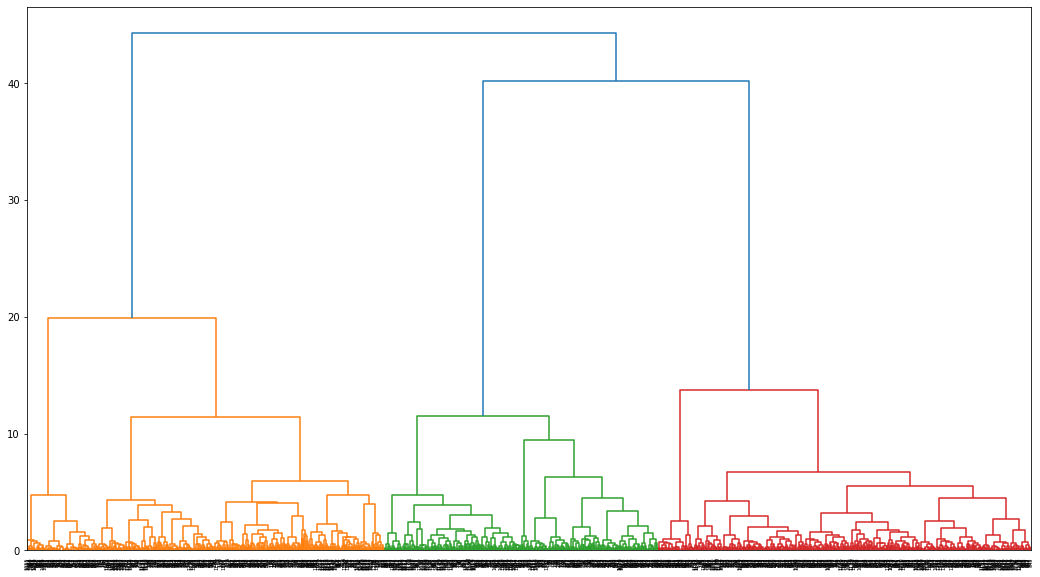

In [79]:
# Create a dendrogram

plt.figure(figsize=(18, 10))
dendrogram = sch.dendrogram (sch.linkage(X, method = 'ward'))


In [39]:
#plt.scatter (points[0][:,0], points[0][:,1])

In [59]:
# perform the actual clustering 
cluster = AgglomerativeClustering (n_clusters = 4, 
                              affinity = 'euclidean',
                              linkage = 'ward')

In [80]:
y_hc = cluster.fit_predict(X)

In [81]:
y_hc

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [83]:
#plt.figure(figsize=(10, 7))
#plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')

In [69]:
print(cluster.labels_)

[1 1 1 ... 0 0 0]


In [76]:
#plt.scatter(X[y_hc == 0,0], X[y_hc == 0,1], s=100, c='cyan')
#plt.scatter(X[y_hc == 1,0], X[y_hc == 1,1], s=100, c='yellow')
#plt.scatter(X[y_hc == 2,0], X[y_hc == 2,1], s=100, c='blue')
#plt.scatter(X[y_hc == 3,0], X[y_hc == 3,1], s=100, c='purple')